In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [8]:
parameters = pd.read_csv('Parametros_finales.csv', index_col=0)
parameters.head()

,fileid,p,alpha,q,r,k,tau,m0,b0,error,p_tilde,q_tilde,alpha_tilde,r_tilde,k_tilde,tau_tilde
0,2397767,0.077835,0.001396,0.312934,0.350682,0.575831,68.168081,1.000000,1.000000,0.014379,1.0,4.020491,0.017942,4.505470,7.398119,5.305846
1,1214612,0.135511,0.008321,0.461608,0.413892,0.442661,16.127937,0.894919,0.890439,0.011273,1.0,3.406421,0.061094,3.069670,2.908710,2.185517
2,1518688,0.171239,0.001273,0.125884,0.031279,-0.101911,116.175745,0.907296,0.952006,0.007711,1.0,0.735134,0.007798,0.174085,-0.566575,19.893796
3,1510105,0.097321,0.010770,0.236805,0.196625,0.003070,38.722599,1.034615,1.003087,0.015781,1.0,2.433228,0.107294,2.083871,0.031638,3.768534
4,1134876,0.074291,0.023095,0.280250,0.264289,-0.171589,80.580418,0.999539,0.990230,0.020916,1.0,3.772337,0.307977,3.590947,-2.287126,5.986378


### Series clasificadas a mano 

In [9]:
series_classification = pd.read_csv('Clasificacion_series.csv')
series_classification.head()

,fileid,caida,bump,bump_visibility,buen_ajuste
0,1020772,3,4,1,si
1,1049177,1,2,1,si
2,1049654,3,2,1,no
3,1075091,3,3,2,si
4,1093872,1,3,2,si


#### Códigos

**Caída**: 

1. Pendiente positiva en blogs. 
2. Pendiente negativa en blogs, mas lenta que en los medios.
3. Misma caída.
4. Caída en blogs más rápida que en los medios.

**Bump**:

2. Bump dominante en blogs.
3. Iguales.
4. Bump dominante en medios.

**Bump visibility**:

1. Sí.
2. Muy tenue.
3. No.

In [10]:
df = parameters.merge(series_classification, on='fileid')
df = df[df['buen_ajuste'] == 'si'].reset_index(drop = True)

### Plots with labels

In [11]:
marker_dict = {1: 'o', 2: 'x', 3: 'x'}
color_dict = {1: 'y', 2: 'b', 3: 'g', 4: 'r'}

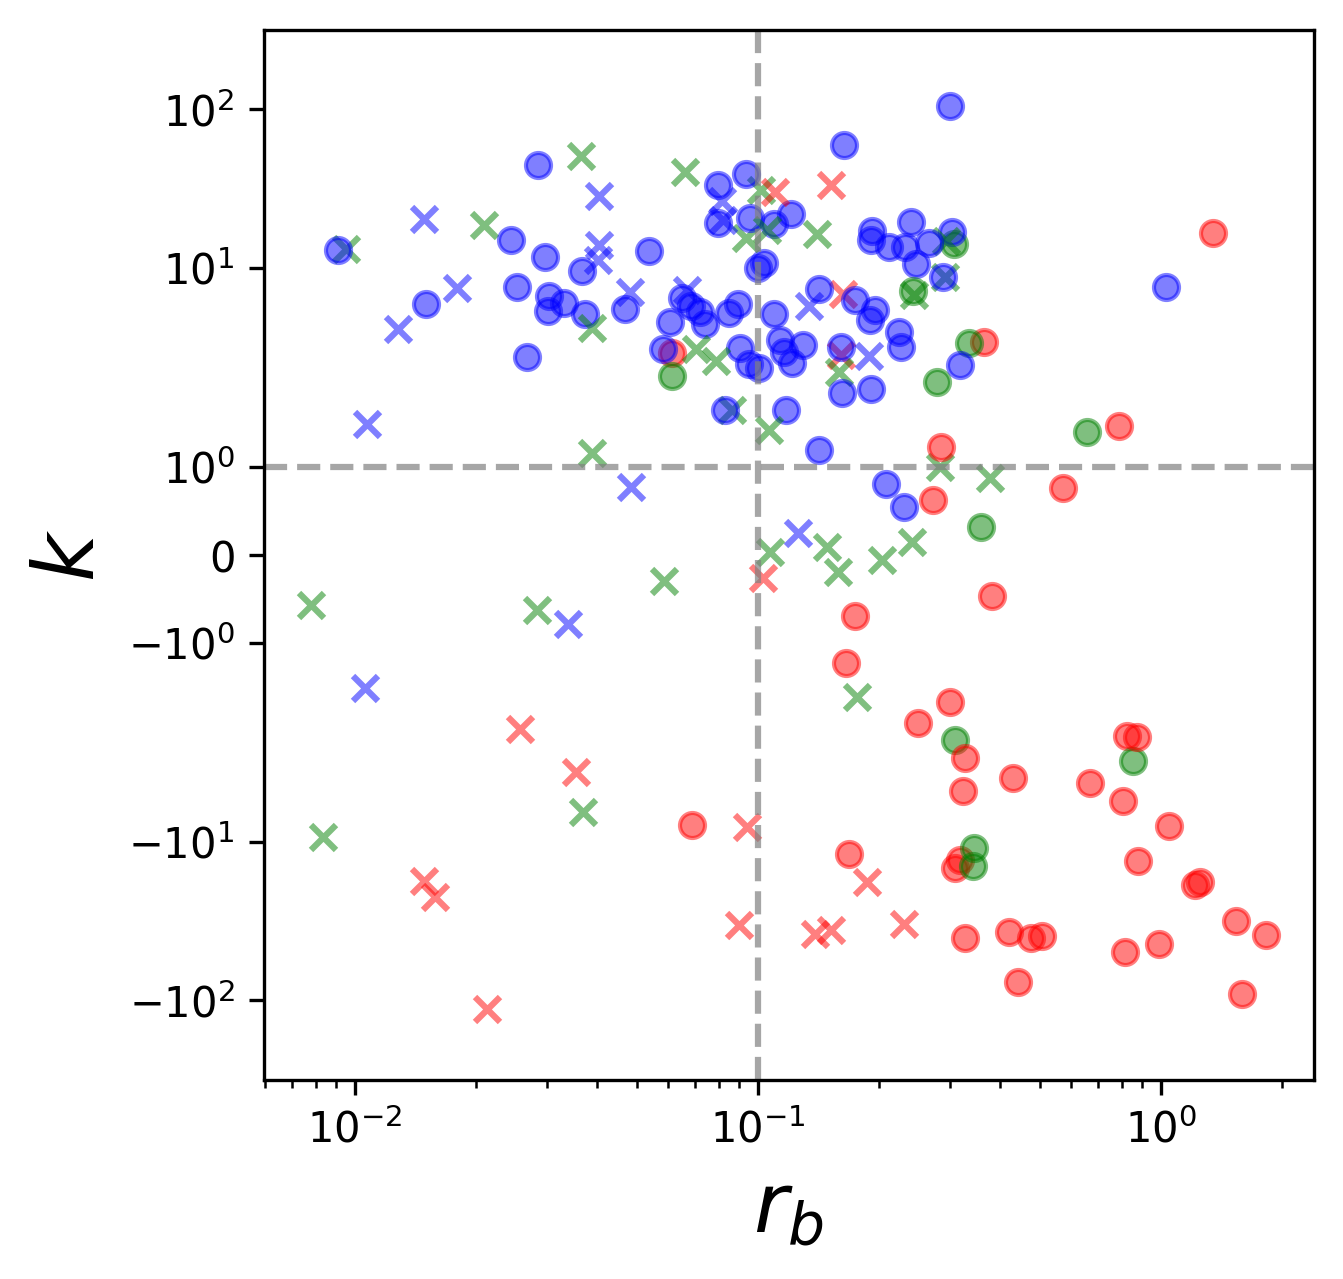

In [12]:
plt.figure(dpi = 300, figsize = (5,5))
plt.axes([0.20, 0.20, 0.70, 0.70])

for i in range(df.shape[0]):
    plt.scatter(df['alpha_tilde'].iloc[i], df['k_tilde'].iloc[i], marker = marker_dict[df.bump_visibility[i]], color = color_dict[df.bump[i]], alpha = 0.50)

plt.axhline(1.00, color = 'gray', linestyle = 'dashed', alpha = 0.70)
plt.axvline(0.1, color = 'gray', linestyle = 'dashed', alpha = 0.70)

plt.xscale('log')
plt.yscale('symlog')
plt.ylim([-10**2.5, 10**2.5])
plt.xlabel(r'$r_b$', size = 20)
plt.ylabel(r'$k$', size = 20)

plt.savefig('Figure_alphak_labeled.png')

plt.show()

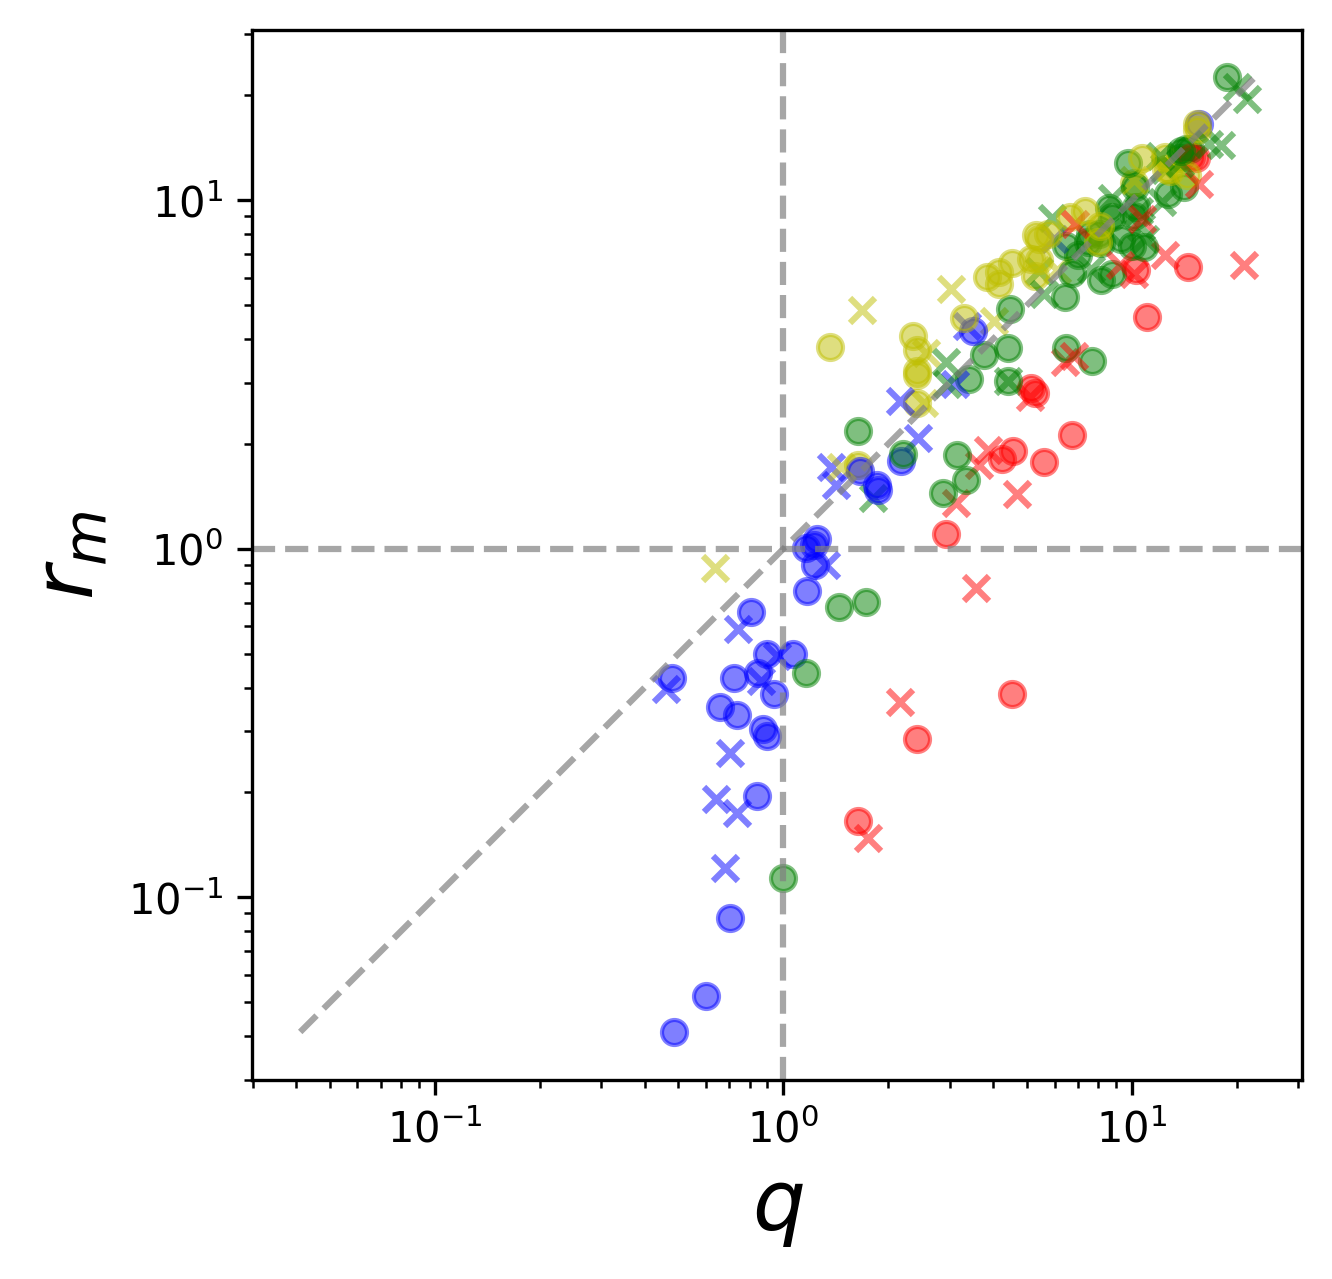

In [13]:
plt.figure(dpi = 300, figsize = (5,5))
plt.axes([0.20, 0.20, 0.70, 0.70])
for i in range(df.shape[0]):
    plt.scatter(df['q_tilde'].iloc[i], df['r_tilde'].iloc[i], marker = marker_dict[df.bump_visibility[i]], color = color_dict[df.caida[i]], alpha = 0.50)
plt.plot(df['r_tilde'].sort_values(), df['r_tilde'].sort_values(), color = 'gray', linestyle = 'dashed', alpha = 0.70)
plt.axvline(1.00, color = 'gray', linestyle = 'dashed', alpha = 0.70)
plt.axhline(1.00, color = 'gray', linestyle = 'dashed', alpha = 0.70)

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$q$', size = 20)
plt.ylabel(r'$r_m$', size = 20)

plt.savefig('Figure_rq_labeled.png')

plt.show()

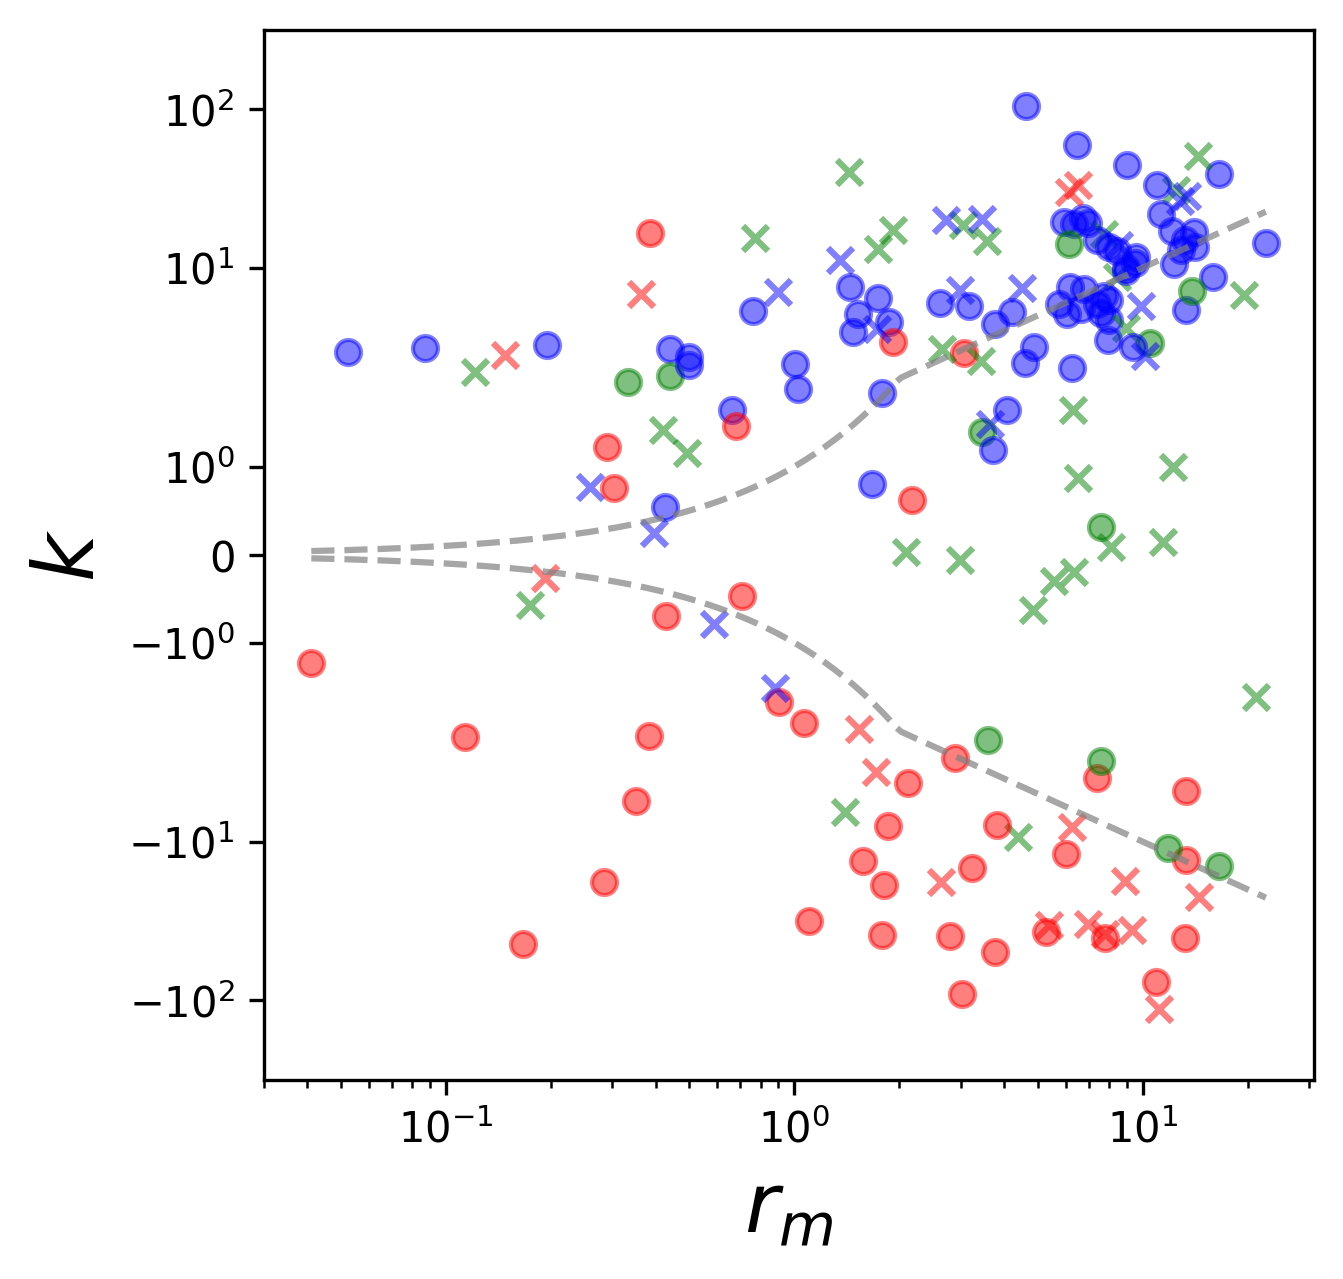

In [14]:
plt.figure(dpi = 300, figsize = (5,5))
plt.axes([0.20, 0.20, 0.70, 0.70])
for i in range(df.shape[0]):
    plt.scatter(df['r_tilde'].iloc[i], df['k_tilde'].iloc[i], marker = marker_dict[df.bump_visibility[i]], color = color_dict[df.bump[i]], alpha = 0.50)

plt.plot(np.logspace(np.log10(df['r_tilde'].min()), np.log10(df['r_tilde'].max()), 200), [i for i in np.logspace(np.log10(df['r_tilde'].min()), np.log10(df['r_tilde'].max()), 200)], color = 'gray', linestyle = 'dashed', alpha = 0.70)
plt.plot(np.logspace(np.log10(df['r_tilde'].min()), np.log10(df['r_tilde'].max()), 200), [-i for i in np.logspace(np.log10(df['r_tilde'].min()), np.log10(df['r_tilde'].max()), 200)], color = 'gray', linestyle = 'dashed', alpha = 0.70)

    
plt.xscale('log')
plt.yscale('symlog')
plt.ylim([-10**2.5, 10**2.5])

plt.xlabel(r'$r_m$', size = 20)
plt.ylabel(r'$k$', size = 20)

plt.savefig('Figure_rk_labeled.png')

plt.show()

49.30406536679975
[42.43468525 67.4361073 ]


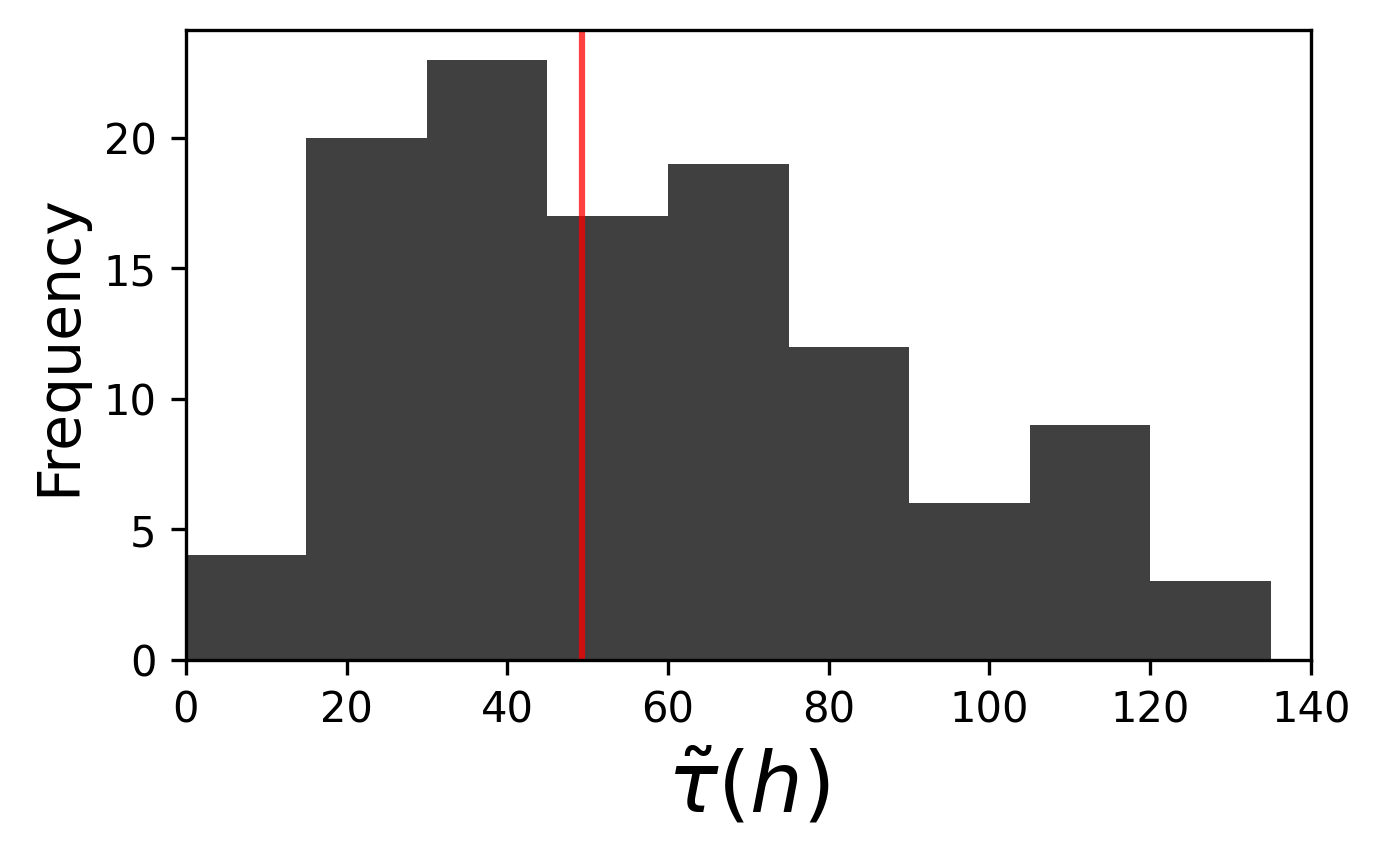

In [15]:
plt.figure(dpi = 300, figsize = (5,3))
plt.axes([0.15, 0.20, 0.75, 0.70])
plt.hist(df[df.bump_visibility == 1]['tau'].tolist(), bins = 10, color = 'k', alpha = .75, range = [0, 150])
plt.axvline(np.median(df[df.bump_visibility == 1]['tau'].tolist()), color = 'r', alpha = 0.75)
print(np.median(df[df.bump_visibility == 1]['tau'].tolist()))
print(np.quantile(df[df.bump_visibility == 1]['tau'].tolist(), q = [0.36, 0.68]))

plt.xlabel(r'$\tilde{\tau} (h)$', size = 20)
plt.xlim([0.00, 140])
plt.ylabel('Frequency', size = 14)
plt.savefig('Figure_tau_tilde.png')

plt.show()

Series with interest:

In [16]:
# Bump dominante en los medios
aux = df[(df['alpha_tilde'] > 0.10) & (df['k_tilde'] < 1.00) & (df['bump'] == 4) & (df['bump_visibility'] == 1)].fileid
aux.reset_index(drop = True).to_csv('Dominant_bumps_in_media.csv', index = False)

In [17]:
# Bump dominante en los blogs por retroalimentacion
aux = df[(df['alpha_tilde'] > 0.10) & (df['k_tilde'] > 1.00) & (df['bump'] == 2) & (df['bump_visibility'] == 1)].fileid
aux.reset_index(drop = True).to_csv('Dominant_bumps_in_blogs_retroalimentation.csv', index = False)

In [18]:
# Bump dominante en los blogs por autoretroalimentacion
aux = df[(df['alpha_tilde'] < 0.10) & (df['k_tilde'] > 1.00) & (df['bump'] == 2) & (df['bump_visibility'] == 1)].fileid
aux.reset_index(drop = True).to_csv('Dominant_bumps_in_blogs_autoretroalimentation.csv', index = False)

In [19]:
# No bump solo caida
aux = df[(df['alpha_tilde'] < 0.10) & (df['bump_visibility'] != 1)].fileid
aux.reset_index(drop = True).to_csv('Dominant_bumps_in_only_decay.csv', index = False)